In [1]:
import cv2
import numpy as np

In [40]:
cap1 = cv2.VideoCapture(0)
cap2 = cv2.VideoCapture(1)

In [41]:
i = 10

while cap1.isOpened() and cap2.isOpened() :
    success1, image1 = cap1.read()
    success2, image2 = cap2.read()

    if not success1 or not success2 :
        print(image1, image2)
        print('video read failed.')
        break

    image1 = cv2.resize(image1, (640, 480))
    image2 = cv2.resize(image2, (640, 480))


    cv2.imshow('2 cameras', np.hstack((image1, image2)))
    i -= 1
    if(i==0):
        cv2.imencode('left_camera.jpg',image1)
        cv2.imencode('right_camera.jpg',image2)
        break
    if cv2.waitKey(1) == ord('q') : 
        break

cap1.release()
cap2.release()
cv2.destroyAllWindows()

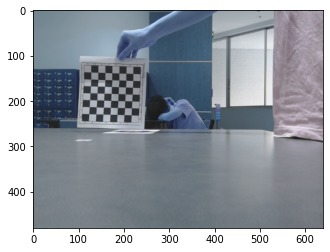

In [42]:
import matplotlib.pyplot as plt
plt.imshow(image1)
plt.show()

In [43]:
left_image.shape

(480, 640)

In [44]:
import cv2
import numpy as np

# Define the number of corners in the calibration pattern (inner corners)
pattern_size = (7, 7)  # Modify this according to your calibration pattern

# Create the calibration pattern points
calibration_pattern_points = np.zeros((pattern_size[0] * pattern_size[1], 3), np.float32)
calibration_pattern_points[:, :2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape(-1, 2)

# Arrays to store object points and image points from all calibration images
object_points = []  # 3D points of the calibration pattern
image_points_left = []  # 2D points in the left camera image
image_points_right = []  # 2D points in the right camera image

left_image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
right_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Find corners in the calibration pattern for both cameras
ret_left, corners_left = cv2.findChessboardCorners(left_image, pattern_size)
ret_right, corners_right = cv2.findChessboardCorners(right_image, pattern_size)

# If corners are found, add object points and image points to the lists
if ret_left and ret_right:
    object_points.append(calibration_pattern_points)
    image_points_left.append(corners_left)
    image_points_right.append(corners_right)

# Camera calibration for left camera
ret_left, left_camera_matrix, left_distortion_coeffs, _, _ = cv2.calibrateCamera(
    object_points,
    image_points_left,
    left_image.shape[::-1],
    None,
    None
)

# Camera calibration for right camera
ret_right, right_camera_matrix, right_distortion_coeffs, _, _ = cv2.calibrateCamera(
    object_points,
    image_points_right,
    right_image.shape[::-1],
    None,
    None
)

# Perform stereo calibration
ret, left_camera_matrix, left_distortion_coeffs, right_camera_matrix, right_distortion_coeffs, rotation_matrix, translation_vector, essential_matrix, fundamental_matrix = cv2.stereoCalibrate(
    object_points,
    image_points_left,
    image_points_right,
    left_camera_matrix,
    left_distortion_coeffs,
    right_camera_matrix,
    right_distortion_coeffs,
    left_image.shape[::-1],  # Size of the calibration images
    flags=cv2.CALIB_FIX_INTRINSIC
)
# Print the camera calibration parameters
print("Left Camera Matrix:\n", left_camera_matrix)
print("Right Camera Matrix:\n", right_camera_matrix)
print("Left Distortion Coefficients:\n", left_distortion_coeffs)
print("Right Distortion Coefficients:\n", right_distortion_coeffs)
print("Rotation Matrix:\n", rotation_matrix)
print("Translation Vector:\n", translation_vector)

Left Camera Matrix:
 [[2.09145194e+03 0.00000000e+00 2.47251669e+02]
 [0.00000000e+00 1.90222685e+03 3.20180951e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Right Camera Matrix:
 [[312.99757712   0.         328.0011193 ]
 [  0.         312.93293435 246.53818365]
 [  0.           0.           1.        ]]
Left Distortion Coefficients:
 [[-1.33277678e+00 -2.99244512e+01  8.09185345e-02 -2.20212788e-01
   9.49948013e+03]]
Right Distortion Coefficients:
 [[ 2.97446562e-01 -2.40119377e+00  5.89258086e-03  2.29292743e-02
   8.60922641e+00]]
Rotation Matrix:
 [[ 0.86739545  0.02191537 -0.49713665]
 [-0.03004417  0.99951362 -0.00835879]
 [ 0.49671166  0.02218643  0.867632  ]]
Translation Vector:
 [[ 69.04622666]
 [  6.90678362]
 [-76.226055  ]]
